In [1]:
import numpy as np 

In [2]:
X = np.load('X.npy')

In [4]:
X.shape

(2062, 64, 64)

In [34]:
X = X.reshape(2062,64,64,1)

In [5]:
Y = np.load('Y.npy')

In [7]:
Y.shape

(2062, 10)

TypeError: Invalid shape (64, 64, 1) for image data

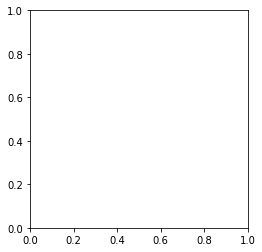

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(X[2061],cmap='gray')

In [23]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test , y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [27]:
import tensorflow as tf
from tensorflow import keras as keras 
from keras import layers
from keras import models

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [66]:
model = models.Sequential([
    layers.Conv2D(32,5,input_shape=(64,64,1)) ,
    layers.MaxPool2D() ,
    layers.Conv2D(64,5) ,
    layers.MaxPool2D() ,
    
    layers.Flatten() ,
    layers.Dense(512,activation=tf.nn.relu) ,
    layers.Dropout(0.2) ,
    layers.Dense(512,activation=tf.nn.relu) ,
    layers.Dense(10,activation=tf.nn.sigmoid)
])
model.compile(
    'adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
)

In [67]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 60, 60, 32)        832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               5538304   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)             

In [68]:
model.fit(
    x_train,
    y_train ,
    epochs=5 ,
    validation_data=(x_test,y_test)
)

Train on 1649 samples, validate on 413 samples
Epoch 1/5
1649/1649 [==============================] - 26s 16ms/step - loss: 1.9679 - accuracy: 0.3069 - val_loss: 1.1758 - val_accuracy: 0.6199
Epoch 2/5
1649/1649 [==============================] - 23s 14ms/step - loss: 0.8331 - accuracy: 0.7417 - val_loss: 0.5462 - val_accuracy: 0.8208
Epoch 3/5
1649/1649 [==============================] - 25s 15ms/step - loss: 0.4085 - accuracy: 0.8636 - val_loss: 0.5472 - val_accuracy: 0.8305
Epoch 4/5
1649/1649 [==============================] - 25s 15ms/step - loss: 0.2186 - accuracy: 0.9224 - val_loss: 0.4162 - val_accuracy: 0.8838
Epoch 5/5
1649/1649 [==============================] - 25s 15ms/step - loss: 0.1508 - accuracy: 0.9491 - val_loss: 0.4214 - val_accuracy: 0.8838
